# Initial Steps

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\hp\Downloads\1111\Dehire\Plastic\cleaned_monthly_Plastic_data.csv", parse_dates=['date'])
df = df.set_index('date')
df

quantity
date                
2019-12-01     10942
2020-01-01     11941
2020-02-01     12103
2020-03-01     12793
2020-04-01     12169
2020-05-01     12374
2020-06-01     12185
2020-07-01     12389
2020-08-01     12345
2020-09-01     12149
2020-10-01     12642
2020-11-01     12891
2020-12-01     11789
2021-01-01     12788
2021-02-01     12950
2021-03-01     13640
2021-04-01     13016
2021-05-01     13221
2021-06-01     13032
2021-07-01     13236
2021-08-01     13192
2021-09-01     12996
2021-10-01     13489
2021-11-01     13738
2021-12-01     12636
2022-01-01     13635
2022-02-01     13797
2022-03-01     14487
2022-04-01     13863
2022-05-01     14068
2022-06-01     13879
2022-07-01     14083
2022-08-01     14039
2022-09-01     13844
2022-10-01     14336
2022-11-01     14585

# Preparing Data For Model Based Forecasting

## Creating T, T_square, Log_T Columns

In [2]:
import numpy as np
pLen = len(df)
df["t"] = np.arange(1,pLen+1)
df["t_square"] = df["t"] * df["t"]
df["log_t"] = np.log(df["quantity"].astype(int)) 
df

quantity   t  t_square     log_t
date                                        
2019-12-01     10942   1         1  9.300364
2020-01-01     11941   2         4  9.387733
2020-02-01     12103   3         9  9.401209
2020-03-01     12793   4        16  9.456653
2020-04-01     12169   5        25  9.406647
2020-05-01     12374   6        36  9.423353
2020-06-01     12185   7        49  9.407961
2020-07-01     12389   8        64  9.424564
2020-08-01     12345   9        81  9.421006
2020-09-01     12149  10       100  9.405002
2020-10-01     12642  11       121  9.444780
2020-11-01     12891  12       144  9.464285
2020-12-01     11789  13       169  9.374922
2021-01-01     12788  14       196  9.456263
2021-02-01     12950  15       225  9.468851
2021-03-01     13640  16       256  9.520762
2021-04-01     13016  17       289  9.473935
2021-05-01     13221  18       324  9.489562
2021-06-01     13032  19       361  9.475163
2021-07-01     13236  20       400  9.490696
2021-08-01     13192  21       441  9.487366
2021-09-01     12996  22       484  9.472397
2021-10-01     13489  23       529  9.509630
2021-11-01     13738  24       576  9.527921
2021-12-01     12636  25       625  9.444305
2022-01-01     13635  26       676  9.520395
2022-02-01     13797  27       729  9.532206
2022-03-01     14487  28       784  9.581007
2022-04-01     13863  29       841  9.536979
2022-05-01     14068  30       900  9.551658
2022-06-01     13879  31       961  9.538132
2022-07-01     14083  32      1024  9.552724
2022-08-01     14039  33      1089  9.549594
2022-09-01     13844  34      1156  9.535607
2022-10-01     14336  35      1225  9.570529
2022-11-01     14585  36      1296  9.587749

## Creating Month Dummy Variables

In [3]:
df['date'] = df.index
df['Month'] = pd.to_datetime(df.date, format='%m').dt.strftime('%b')
month_dummies = pd.DataFrame(pd.get_dummies(df['Month']))
df = df.drop(['date','Month'], axis=1)
df1 = pd.concat([df, month_dummies], axis = 1)
df1

quantity   t  t_square     log_t  Apr  Aug  Dec  Feb  Jan  Jul  \
date                                                                         
2019-12-01     10942   1         1  9.300364    0    0    1    0    0    0   
2020-01-01     11941   2         4  9.387733    0    0    0    0    1    0   
2020-02-01     12103   3         9  9.401209    0    0    0    1    0    0   
2020-03-01     12793   4        16  9.456653    0    0    0    0    0    0   
2020-04-01     12169   5        25  9.406647    1    0    0    0    0    0   
2020-05-01     12374   6        36  9.423353    0    0    0    0    0    0   
2020-06-01     12185   7        49  9.407961    0    0    0    0    0    0   
2020-07-01     12389   8        64  9.424564    0    0    0    0    0    1   
2020-08-01     12345   9        81  9.421006    0    1    0    0    0    0   
2020-09-01     12149  10       100  9.405002    0    0    0    0    0    0   
2020-10-01     12642  11       121  9.444780    0    0    0    0    0    0   
2020-11-01     12891  12       144  9.464285    0    0    0    0    0    0   
2020-12-01     11789  13       169  9.374922    0    0    1    0    0    0   
2021-01-01     12788  14       196  9.456263    0    0    0    0    1    0   
2021-02-01     12950  15       225  9.468851    0    0    0    1    0    0   
2021-03-01     13640  16       256  9.520762    0    0    0    0    0    0   
2021-04-01     13016  17       289  9.473935    1    0    0    0    0    0   
2021-05-01     13221  18       324  9.489562    0    0    0    0    0    0   
2021-06-01     13032  19       361  9.475163    0    0    0    0    0    0   
2021-07-01     13236  20       400  9.490696    0    0    0    0    0    1   
2021-08-01     13192  21       441  9.487366    0    1    0    0    0    0   
2021-09-01     12996  22       484  9.472397    0    0    0    0    0    0   
2021-10-01     13489  23       529  9.509630    0    0    0    0    0    0   
2021-11-01     13738  24       576  9.527921    0    0    0    0    0    0   
2021-12-01     12636  25       625  9.444305    0    0    1    0    0    0   
2022-01-01     13635  26       676  9.520395    0    0    0    0    1    0   
2022-02-01     13797  27       729  9.532206    0    0    0    1    0    0   
2022-03-01     14487  28       784  9.581007    0    0    0    0    0    0   
2022-04-01     13863  29       841  9.536979    1    0    0    0    0    0   
2022-05-01     14068  30       900  9.551658    0    0    0    0    0    0   
2022-06-01     13879  31       961  9.538132    0    0    0    0    0    0   
2022-07-01     14083  32      1024  9.552724    0    0    0    0    0    1   
2022-08-01     14039  33      1089  9.549594    0    1    0    0    0    0   
2022-09-01     13844  34      1156  9.535607    0    0    0    0    0    0   
2022-10-01     14336  35      1225  9.570529    0    0    0    0    0    0   
2022-11-01     14585  36      1296  9.587749    0    0    0    0    0    0   

            Jun  Mar  May  Nov  Oct  Sep  
date                                      
2019-12-01    0    0    0    0    0    0  
2020-01-01    0    0    0    0    0    0  
2020-02-01    0    0    0    0    0    0  
2020-03-01    0    1    0    0    0    0  
2020-04-01    0    0    0    0    0    0  
2020-05-01    0    0    1    0    0    0  
2020-06-01    1    0    0    0    0    0  
2020-07-01    0    0    0    0    0    0  
2020-08-01    0    0    0    0    0    0  
2020-09-01    0    0    0    0    0    1  
2020-10-01    0    0    0    0    1    0  
2020-11-01    0    0    0    1    0    0  
2020-12-01    0    0    0    0    0    0  
2021-01-01    0    0    0    0    0    0  
2021-02-01    0    0    0    0    0    0  
2021-03-01    0    1    0    0    0    0  
2021-04-01    0    0    0    0    0    0  
2021-05-01    0    0    1    0    0    0  
2021-06-01    1    0    0    0    0    0  
2021-07-01    0    0    0    0    0    0  
2021-08-01    0    0    0    0    0    0  
2021-09-01    0    0    0    0    0    1  
2021-10-01    0

## Splitting Prepared Data

In [4]:
Train = df1.drop(df1.tail(12).index)
Train

quantity   t  t_square     log_t  Apr  Aug  Dec  Feb  Jan  Jul  \
date                                                                         
2019-12-01     10942   1         1  9.300364    0    0    1    0    0    0   
2020-01-01     11941   2         4  9.387733    0    0    0    0    1    0   
2020-02-01     12103   3         9  9.401209    0    0    0    1    0    0   
2020-03-01     12793   4        16  9.456653    0    0    0    0    0    0   
2020-04-01     12169   5        25  9.406647    1    0    0    0    0    0   
2020-05-01     12374   6        36  9.423353    0    0    0    0    0    0   
2020-06-01     12185   7        49  9.407961    0    0    0    0    0    0   
2020-07-01     12389   8        64  9.424564    0    0    0    0    0    1   
2020-08-01     12345   9        81  9.421006    0    1    0    0    0    0   
2020-09-01     12149  10       100  9.405002    0    0    0    0    0    0   
2020-10-01     12642  11       121  9.444780    0    0    0    0    0    0   
2020-11-01     12891  12       144  9.464285    0    0    0    0    0    0   
2020-12-01     11789  13       169  9.374922    0    0    1    0    0    0   
2021-01-01     12788  14       196  9.456263    0    0    0    0    1    0   
2021-02-01     12950  15       225  9.468851    0    0    0    1    0    0   
2021-03-01     13640  16       256  9.520762    0    0    0    0    0    0   
2021-04-01     13016  17       289  9.473935    1    0    0    0    0    0   
2021-05-01     13221  18       324  9.489562    0    0    0    0    0    0   
2021-06-01     13032  19       361  9.475163    0    0    0    0    0    0   
2021-07-01     13236  20       400  9.490696    0    0    0    0    0    1   
2021-08-01     13192  21       441  9.487366    0    1    0    0    0    0   
2021-09-01     12996  22       484  9.472397    0    0    0    0    0    0   
2021-10-01     13489  23       529  9.509630    0    0    0    0    0    0   
2021-11-01     13738  24       576  9.527921    0    0    0    0    0    0   

            Jun  Mar  May  Nov  Oct  Sep  
date                                      
2019-12-01    0    0    0    0    0    0  
2020-01-01    0    0    0    0    0    0  
2020-02-01    0    0    0    0    0    0  
2020-03-01    0    1    0    0    0    0  
2020-04-01    0    0    0    0    0    0  
2020-05-01    0    0    1    0    0    0  
2020-06-01    1    0    0    0    0    0  
2020-07-01    0    0    0    0    0    0  
2020-08-01    0    0    0    0    0    0  
2020-09-01    0    0    0    0    0    1  
2020-10-01    0    0    0    0    1    0  
2020-11-01    0    0    0    1    0    0  
2020-12-01    0    0    0    0    0    0  
2021-01-01    0    0    0    0    0    0  
2021-02-01    0    0    0    0    0    0  
2021-03-01    0    1    0    0    0    0  
2021-04-01    0    0    0    0    0    0  
2021-05-01    0    0    1    0    0    0  
2021-06-01    1    0    0    0    0    0  
2021-07-01    0    0    0    0    0    0  
2021-08-01    0    0    0    0    0    0  
2021-09-01    0    0    0    0    0    1  
2021-10-01    0    0    0    0    1    0  
2021-11-01    0    0    0    1    0    0

In [5]:
Train.to_csv('Train_plastic.csv')

In [6]:
Test = df1.tail(12)
Test

quantity   t  t_square     log_t  Apr  Aug  Dec  Feb  Jan  Jul  \
date                                                                         
2021-12-01     12636  25       625  9.444305    0    0    1    0    0    0   
2022-01-01     13635  26       676  9.520395    0    0    0    0    1    0   
2022-02-01     13797  27       729  9.532206    0    0    0    1    0    0   
2022-03-01     14487  28       784  9.581007    0    0    0    0    0    0   
2022-04-01     13863  29       841  9.536979    1    0    0    0    0    0   
2022-05-01     14068  30       900  9.551658    0    0    0    0    0    0   
2022-06-01     13879  31       961  9.538132    0    0    0    0    0    0   
2022-07-01     14083  32      1024  9.552724    0    0    0    0    0    1   
2022-08-01     14039  33      1089  9.549594    0    1    0    0    0    0   
2022-09-01     13844  34      1156  9.535607    0    0    0    0    0    0   
2022-10-01     14336  35      1225  9.570529    0    0    0    0    0    0   
2022-11-01     14585  36      1296  9.587749    0    0    0    0    0    0   

            Jun  Mar  May  Nov  Oct  Sep  
date                                      
2021-12-01    0    0    0    0    0    0  
2022-01-01    0    0    0    0    0    0  
2022-02-01    0    0    0    0    0    0  
2022-03-01    0    1    0    0    0    0  
2022-04-01    0    0    0    0    0    0  
2022-05-01    0    0    1    0    0    0  
2022-06-01    1    0    0    0    0    0  
2022-07-01    0    0    0    0    0    0  
2022-08-01    0    0    0    0    0    0  
2022-09-01    0    0    0    0    0    1  
2022-10-01    0    0    0    0    1    0  
2022-11-01    0    0    0    1    0    0

In [7]:
Test.to_csv('test_plastic.csv')

# Model Building

## 1. Linear Regression

In [8]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('quantity ~ t', data = Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['quantity']) - np.array(pred_linear))**2))
rmse_linear

375.06708955421345

## 2. Exponential Regression

In [9]:
Exp = smf.ols('log_t ~ t', data = Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['quantity']) - np.array(np.exp(pred_Exp)))**2))
rmse_Exp

398.4861650930051

## 3. Quadratic Regression

In [10]:
Quad = smf.ols('quantity ~ t + t_square', data = Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t", "t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['quantity']) - np.array(pred_Quad))**2))
rmse_Quad

404.0407080137382

## 4. Additive Seasonality

In [11]:
add_sea = smf.ols('quantity ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['quantity']) - np.array(pred_add_sea))**2))
rmse_add_sea

1270.5833633938887

## 5. Multiplicative Seasonality

In [12]:
Mul_sea = smf.ols('log_t ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['quantity']) - np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1277.6755558419113

## 6. Additive Seasonality Quadratic Trend

In [13]:
add_sea_Quad = smf.ols('quantity ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['quantity'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

0.2886751342734535

## 7. Multiplicative Seasonality Linear Trend

In [14]:
Mul_Add_sea = smf.ols('log_t ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['quantity']) - np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

79.19246150469067

# Testing & Checking Best Model

In [15]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse = pd.DataFrame(data)
table_rmse

MODEL  RMSE_Values
0        rmse_linear   375.067090
1           rmse_Exp   398.486165
2          rmse_Quad   404.040708
3       rmse_add_sea  1270.583363
4  rmse_add_sea_quad     0.288675
5      rmse_Mult_sea  1277.675556
6  rmse_Mult_add_sea    79.192462

# Forecasting

## 1. Getting Data For Forecasting

In [16]:
forecast_data_path = "C:/Users/hp/Downloads/1111/Dehire/Plastic/plastic_data_to_forecast.csv"

In [17]:
df2 = pd.read_csv(forecast_data_path, parse_dates=['date'])
df2

date
0  2022-12-01
1  2023-01-01
2  2023-02-01
3  2023-03-01
4  2023-04-01
5  2023-05-01
6  2023-06-01
7  2023-07-01
8  2023-08-01
9  2023-09-01
10 2023-10-01
11 2023-11-01

## 2. Getting Data Ready

In [18]:
df2['date'] = pd.date_range("2022-12-01", periods=12, freq="MS")
df2['Month'] = pd.to_datetime(df2.date, format='%m').dt.strftime('%b')
month_dummies = pd.DataFrame(pd.get_dummies(df2['Month']))
df2 = df2.drop(['Month'], axis=1)
df2 = pd.concat([df2, month_dummies], axis = 1)
pLen1 = len(df2)
df2["t"] = np.arange(37,pLen1+1+36)
df2["t_square"] = df2["t"] * df2["t"]
df2 = df2.set_index('date')
df2

Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep   t  \
date                                                                         
2022-12-01    0    0    1    0    0    0    0    0    0    0    0    0  37   
2023-01-01    0    0    0    0    1    0    0    0    0    0    0    0  38   
2023-02-01    0    0    0    1    0    0    0    0    0    0    0    0  39   
2023-03-01    0    0    0    0    0    0    0    1    0    0    0    0  40   
2023-04-01    1    0    0    0    0    0    0    0    0    0    0    0  41   
2023-05-01    0    0    0    0    0    0    0    0    1    0    0    0  42   
2023-06-01    0    0    0    0    0    0    1    0    0    0    0    0  43   
2023-07-01    0    0    0    0    0    1    0    0    0    0    0    0  44   
2023-08-01    0    1    0    0    0    0    0    0    0    0    0    0  45   
2023-09-01    0    0    0    0    0    0    0    0    0    0    0    1  46   
2023-10-01    0    0    0    0    0    0    0    0    0    0    1    0  47   
2023-11-01    0    0    0    0    0    0    0    0    0    1    0    0  48   

            t_square  
date                  
2022-12-01      1369  
2023-01-01      1444  
2023-02-01      1521  
2023-03-01      1600  
2023-04-01      1681  
2023-05-01      1764  
2023-06-01      1849  
2023-07-01      1936  
2023-08-01      2025  
2023-09-01      2116  
2023-10-01      2209  
2023-11-01      2304

## 3. Best Model

In [19]:
model_full = smf.ols('quantity ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=df1).fit()

In [20]:
model_full.save("model.pickle")

In [21]:
# to load model
from statsmodels.regression.linear_model import OLSResults
model = OLSResults.load("model.pickle")

## 4. Forecasting

In [22]:
pred_new = pd.Series(model_full.predict(df2))
pred_new

date
2022-12-01    13483.169570
2023-01-01    14482.188734
2023-02-01    14644.207898
2023-03-01    15334.227062
2023-04-01    14710.246225
2023-05-01    14915.265389
2023-06-01    14726.284553
2023-07-01    14930.303717
2023-08-01    14886.322880
2023-09-01    14690.675377
2023-10-01    15183.361208
2023-11-01    15432.380372
dtype: float64

In [23]:
df2["forecasted_quantity"] = pd.Series(pred_new)
df2

Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep   t  \
date                                                                         
2022-12-01    0    0    1    0    0    0    0    0    0    0    0    0  37   
2023-01-01    0    0    0    0    1    0    0    0    0    0    0    0  38   
2023-02-01    0    0    0    1    0    0    0    0    0    0    0    0  39   
2023-03-01    0    0    0    0    0    0    0    1    0    0    0    0  40   
2023-04-01    1    0    0    0    0    0    0    0    0    0    0    0  41   
2023-05-01    0    0    0    0    0    0    0    0    1    0    0    0  42   
2023-06-01    0    0    0    0    0    0    1    0    0    0    0    0  43   
2023-07-01    0    0    0    0    0    1    0    0    0    0    0    0  44   
2023-08-01    0    1    0    0    0    0    0    0    0    0    0    0  45   
2023-09-01    0    0    0    0    0    0    0    0    0    0    0    1  46   
2023-10-01    0    0    0    0    0    0    0    0    0    0    1    0  47   
2023-11-01    0    0    0    0    0    0    0    0    0    1    0    0  48   

            t_square  forecasted_quantity  
date                                       
2022-12-01      1369         13483.169570  
2023-01-01      1444         14482.188734  
2023-02-01      1521         14644.207898  
2023-03-01      1600         15334.227062  
2023-04-01      1681         14710.246225  
2023-05-01      1764         14915.265389  
2023-06-01      1849         14726.284553  
2023-07-01      1936         14930.303717  
2023-08-01      2025         14886.322880  
2023-09-01      2116         14690.675377  
2023-10-01      2209         15183.361208  
2023-11-01      2304         15432.380372

## 5. Finding Residuals

In [24]:
full_res = df1.quantity - model_full.predict(df1)
full_res

date
2019-12-01   -0.030197
2020-01-01   -0.020616
2020-02-01   -0.011034
2020-03-01   -0.001452
2020-04-01    0.008130
2020-05-01    0.017712
2020-06-01    0.027294
2020-07-01    0.036876
2020-08-01    0.046458
2020-09-01   -0.277294
2020-10-01    0.065621
2020-11-01    0.075203
2020-12-01    0.038328
2021-01-01    0.038328
2021-02-01    0.038328
2021-03-01    0.038328
2021-04-01    0.038328
2021-05-01    0.038328
2021-06-01    0.038328
2021-07-01    0.038328
2021-08-01    0.038328
2021-09-01   -0.295006
2021-10-01    0.038328
2021-11-01    0.038328
2021-12-01   -0.008130
2022-01-01   -0.017712
2022-02-01   -0.027294
2022-03-01   -0.036876
2022-04-01   -0.046458
2022-05-01   -0.056039
2022-06-01   -0.065621
2022-07-01   -0.075203
2022-08-01   -0.084785
2022-09-01    0.572300
2022-10-01   -0.103949
2022-11-01   -0.113531
dtype: float64

## 6. ACF Plot on Residuals

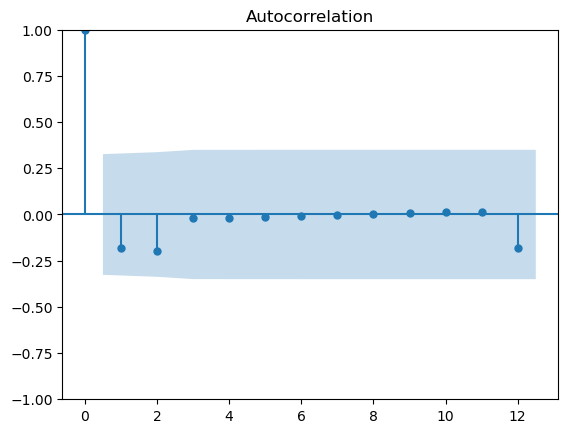

In [25]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(full_res, lags = 12);

## 7. PACF Plot on Residuals

In [26]:
tsa_plots.plot_pacf(full_res, lags=12);

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


## 8. Autoregression Model

In [27]:
from statsmodels.tsa.ar_model import AutoReg
model_ar = AutoReg(full_res, lags=[12])
# model_ar = AutoReg(Train_res, lags=5)
model_fit = model_ar.fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [28]:
print('Coefficients: %s' % model_fit.params)
pred_res = model_fit.predict(start=len(full_res), end=len(full_res)+len(df2)-1, dynamic=False)
pred_res.reset_index(drop=True, inplace=True)
pred_res

Coefficients: const    0.004028
y.L12   -0.527378
dtype: float64


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


0     0.008316
1     0.013369
2     0.018423
3     0.023476
4     0.028529
5     0.033582
6     0.038636
7     0.043689
8     0.048742
9    -0.297790
10    0.058849
11    0.063902
dtype: float64

In [29]:
df3 = pd.concat([df2.reset_index(), pred_res], axis=1)
df3 = df3.set_index('date')
df3 = df3.rename(columns = {0:'Residuals'})
df3

Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep   t  \
date                                                                         
2022-12-01    0    0    1    0    0    0    0    0    0    0    0    0  37   
2023-01-01    0    0    0    0    1    0    0    0    0    0    0    0  38   
2023-02-01    0    0    0    1    0    0    0    0    0    0    0    0  39   
2023-03-01    0    0    0    0    0    0    0    1    0    0    0    0  40   
2023-04-01    1    0    0    0    0    0    0    0    0    0    0    0  41   
2023-05-01    0    0    0    0    0    0    0    0    1    0    0    0  42   
2023-06-01    0    0    0    0    0    0    1    0    0    0    0    0  43   
2023-07-01    0    0    0    0    0    1    0    0    0    0    0    0  44   
2023-08-01    0    1    0    0    0    0    0    0    0    0    0    0  45   
2023-09-01    0    0    0    0    0    0    0    0    0    0    0    1  46   
2023-10-01    0    0    0    0    0    0    0    0    0    0    1    0  47   
2023-11-01    0    0    0    0    0    0    0    0    0    1    0    0  48   

            t_square  forecasted_quantity  Residuals  
date                                                  
2022-12-01      1369         13483.169570   0.008316  
2023-01-01      1444         14482.188734   0.013369  
2023-02-01      1521         14644.207898   0.018423  
2023-03-01      1600         15334.227062   0.023476  
2023-04-01      1681         14710.246225   0.028529  
2023-05-01      1764         14915.265389   0.033582  
2023-06-01      1849         14726.284553   0.038636  
2023-07-01      1936         14930.303717   0.043689  
2023-08-01      2025         14886.322880   0.048742  
2023-09-01      2116         14690.675377  -0.297790  
2023-10-01      2209         15183.361208   0.058849  
2023-11-01      2304         15432.380372   0.063902

In [30]:
df3['final_forecast'] = df3['Residuals'] + df3['forecasted_quantity']
df3

Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep   t  \
date                                                                         
2022-12-01    0    0    1    0    0    0    0    0    0    0    0    0  37   
2023-01-01    0    0    0    0    1    0    0    0    0    0    0    0  38   
2023-02-01    0    0    0    1    0    0    0    0    0    0    0    0  39   
2023-03-01    0    0    0    0    0    0    0    1    0    0    0    0  40   
2023-04-01    1    0    0    0    0    0    0    0    0    0    0    0  41   
2023-05-01    0    0    0    0    0    0    0    0    1    0    0    0  42   
2023-06-01    0    0    0    0    0    0    1    0    0    0    0    0  43   
2023-07-01    0    0    0    0    0    1    0    0    0    0    0    0  44   
2023-08-01    0    1    0    0    0    0    0    0    0    0    0    0  45   
2023-09-01    0    0    0    0    0    0    0    0    0    0    0    1  46   
2023-10-01    0    0    0    0    0    0    0    0    0    0    1    0  47   
2023-11-01    0    0    0    0    0    0    0    0    0    1    0    0  48   

            t_square  forecasted_quantity  Residuals  final_forecast  
date                                                                  
2022-12-01      1369         13483.169570   0.008316    13483.177886  
2023-01-01      1444         14482.188734   0.013369    14482.202103  
2023-02-01      1521         14644.207898   0.018423    14644.226320  
2023-03-01      1600         15334.227062   0.023476    15334.250537  
2023-04-01      1681         14710.246225   0.028529    14710.274754  
2023-05-01      1764         14915.265389   0.033582    14915.298971  
2023-06-01      1849         14726.284553   0.038636    14726.323188  
2023-07-01      1936         14930.303717   0.043689    14930.347406  
2023-08-01      2025         14886.322880   0.048742    14886.371623  
2023-09-01      2116         14690.675377  -0.297790    14690.377587  
2023-10-01      2209         15183.361208   0.058849    15183.420057  
2023-11-01      2304         15432.380372   0.063902    15432.444274

In [31]:
df3 = df3[['forecasted_quantity','Residuals','final_forecast']]
df3

forecasted_quantity  Residuals  final_forecast
date                                                      
2022-12-01         13483.169570   0.008316    13483.177886
2023-01-01         14482.188734   0.013369    14482.202103
2023-02-01         14644.207898   0.018423    14644.226320
2023-03-01         15334.227062   0.023476    15334.250537
2023-04-01         14710.246225   0.028529    14710.274754
2023-05-01         14915.265389   0.033582    14915.298971
2023-06-01         14726.284553   0.038636    14726.323188
2023-07-01         14930.303717   0.043689    14930.347406
2023-08-01         14886.322880   0.048742    14886.371623
2023-09-01         14690.675377  -0.297790    14690.377587
2023-10-01         15183.361208   0.058849    15183.420057
2023-11-01         15432.380372   0.063902    15432.444274

# Forecasting Result

In [32]:
df1.quantity.plot()
df3.final_forecast.plot()

<AxesSubplot:xlabel='date'>

# Saving Forecasted Data

In [33]:
df3.to_csv('Model_Based_Forecasted_Data.csv',encoding='utf-8')
import os
os.getcwd()

'C:\\Users\\hp\\Downloads\\1111\\Dehire\\Plastic\\Model_Based_forecasting'